In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_json('/content/drive/MyDrive/data/portfolio/games.json')

In [ ]:
df = df.T
pd.set_option('display.max_columns', None)
df.head()

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags
20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,,,True,False,False,0,,30,0,,[English],[],"[{'title': 'Buy Galactic Bowling', 'descriptio...",[Perpetual FX Creative],[Perpetual FX Creative],"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow..."
655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,,support@rustymoyher.com,True,True,False,0,,12,0,,"[English, French, Italian, German, Spanish - S...",[],"[{'title': 'Buy Train Bandit', 'description': ...",[Rusty Moyher],[Wild Rooster],"[Single-player, Steam Achievements, Full contr...","[Action, Indie]",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'..."
1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,https://cdn.akamai.steamstatic.com/steam/apps/...,,,ramoncampiaof31@gmail.com,True,False,False,0,,0,0,,"[English, Portuguese - Brazil]",[],"[{'title': 'Buy Jolt Project', 'description': ...",[Campião Games],[Campião Games],[Single-player],"[Action, Adventure, Indie, Strategy]",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,0,0,0 - 20000,0,0,0,0,0,[]
1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,,0,0,,"[English, French, Italian, German, Spanish - S...",[],"[{'title': 'Buy Henosis™', 'description': '', ...",[Odd Critter Games],[Odd Critter Games],"[Single-player, Full controller support]","[Adventure, Casual, Indie]",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su..."
1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,,17,0,This Game may contain content not appropriate ...,"[English, Spanish - Spain]",[],[],[Unusual Games],[Unusual Games],"[Single-player, Steam Achievements]","[Adventure, Indie]",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,0,,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97410 entries, 20200 to 3054200
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      97410 non-null  object
 1   release_date              97410 non-null  object
 2   required_age              97410 non-null  object
 3   price                     97410 non-null  object
 4   dlc_count                 97410 non-null  object
 5   detailed_description      97410 non-null  object
 6   about_the_game            97410 non-null  object
 7   short_description         97410 non-null  object
 8   reviews                   97410 non-null  object
 9   header_image              97410 non-null  object
 10  website                   97410 non-null  object
 11  support_url               97410 non-null  object
 12  support_email             97410 non-null  object
 13  windows                   97410 non-null  object
 14  mac                  

In [ ]:
# Checking for null values
df.isnull().sum()

,0
name,0
release_date,0
required_age,0
price,0
dlc_count,0
detailed_description,0
about_the_game,0
short_description,0
reviews,0
header_image,0


In [ ]:
# Dropping the irrelevant columns for this analysis

df = df.drop(['header_image', 'website', 'support_url', 'support_email', 'notes', 'screenshots', 'movies', 'reviews', 'metacritic_score', 'required_age',
              'detailed_description', 'about_the_game', 'short_description', 'metacritic_url', 'average_playtime_2weeks', 'median_playtime_2weeks', 'peak_ccu',
              'packages', 'publishers', 'developers', 'full_audio_languages', 'user_score', 'score_rank', 'tags', 'supported_languages', 'categories', 'genres'], axis=1)

df.head()

,name,release_date,price,dlc_count,windows,mac,linux,achievements,recommendations,positive,negative,estimated_owners,average_playtime_forever,median_playtime_forever
20200,Galactic Bowling,"Oct 21, 2008",19.99,0,True,False,False,30,0,6,11,0 - 20000,0,0
655370,Train Bandit,"Oct 12, 2017",0.99,0,True,True,False,12,0,53,5,0 - 20000,0,0
1732930,Jolt Project,"Nov 17, 2021",4.99,0,True,False,False,0,0,0,0,0 - 20000,0,0
1355720,Henosis™,"Jul 23, 2020",5.99,0,True,True,True,0,0,3,0,0 - 20000,0,0
1139950,Two Weeks in Painland,"Feb 3, 2020",0.0,0,True,True,False,17,0,50,8,0 - 20000,0,0


In [ ]:
# We have no null values, but some of the 0s still need to be treated
# Converting column data types
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['price'] = df['price'].astype(float)
df['dlc_count'] = df['dlc_count'].astype(int)
df['windows'] = df['windows'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)
df['dlc_count'] = df['dlc_count'].astype(int)
df['positive'] = df['positive'].astype(int)
df['negative'] = df['negative'].astype(int)

# Creating new column
df['release_year'] = df['release_date'].dt.year

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(7)

In [ ]:
# Deleting duplicates
df = df.drop_duplicates()

In [ ]:
# Checking distribution of estimated_owners
df['estimated_owners'].value_counts()

,count
estimated_owners,
0 - 20000,61427
0 - 0,17262
20000 - 50000,8034
50000 - 100000,3978
100000 - 200000,2611
200000 - 500000,2169
500000 - 1000000,912
1000000 - 2000000,523
2000000 - 5000000,330


In [ ]:
# Since the estimated owners are registered in ranges, we're going to use the midpoint of those
df[['lower_bound', 'upper_bound']] = df['estimated_owners'].str.split(' - ', expand=True)

# Converting to numeric
df['lower_bound'] = pd.to_numeric(df['lower_bound'])
df['upper_bound'] = pd.to_numeric(df['upper_bound'])
df['estimated_owners_midpoint'] = (df['lower_bound'] + df['upper_bound']) / 2

# Deleting unnecessary columns
df = df.drop(columns=['estimated_owners', 'lower_bound', 'upper_bound'])

# Converting new column to numeric
df['estimated_owners_midpoint'] = df['estimated_owners_midpoint'].astype(int)
df['estimated_owners_midpoint'].value_counts()

,count
estimated_owners_midpoint,
10000,61427
0,17262
35000,8034
75000,3978
150000,2611
350000,2169
750000,912
1500000,523
3500000,330


In [ ]:
# Checking if the games with 0 estimated owners are valid
df[df['estimated_owners_midpoint'] == 0].head()

,name,release_date,price,dlc_count,windows,mac,linux,achievements,recommendations,positive,negative,average_playtime_forever,median_playtime_forever,release_year,estimated_owners_midpoint
1959480,Eternal Edge+ Prologue,2022-05-05,0.00,0,1,0,0,0,0,0,0,0,0,2022.0,0
1662060,Moon Farming - Prologue,2022-01-06,0.00,0,1,0,0,7,0,0,0,0,0,2022.0,0
1943590,溪风谷之战 Playtest,2022-03-24,0.00,0,1,0,0,0,0,0,0,0,0,2022.0,0
1995240,Deer Journey,2022-07-21,5.39,0,1,0,0,2,0,0,0,0,0,2022.0,0
1966960,Burial Stone Playtest,2022-04-13,0.00,0,1,0,0,0,0,0,0,0,0,2022.0,0


In [ ]:
# Some of the estimated_owners = 0 can indicate low-popularity games, but some titles named as "_____ playtest can be deleted"
# as they don't account for usable titles, as they don't have a game description and other relevant data

df = df[~df['name'].str.contains('playtest', case=False, na=False)]

In [ ]:
# Checking distribution of positive and negative reviews
df[['positive']].value_counts()

,count
positive,
0,27513
1,5921
2,4319
3,3302
4,2809
...,...
306872,1
298300,1
293938,1


In [ ]:
df[['negative']].value_counts()

,count
negative,
0,39763
1,8603
2,5107
3,3469
4,2729
...,...
98701,1
103661,1
106038,1


In [ ]:
# Checking how many rows with both 0 negative and positive reviews
df[(df['positive'] == 0) & (df['negative'] == 0)].shape[0]

25196

In [ ]:
# Checking the if these rows correspond to valid games
df[(df['positive'] == 0) & (df['negative'] == 0)].head(10)

,name,release_date,price,dlc_count,windows,mac,linux,achievements,recommendations,positive,negative,average_playtime_forever,median_playtime_forever,release_year,estimated_owners_midpoint
1732930,Jolt Project,2021-11-17,4.99,0,1,0,0,0,0,0,0,0,0,2021.0,10000
1968760,Legend of Rome - The Wrath of Mars,2022-05-05,9.99,0,1,0,0,0,0,0,0,0,0,2022.0,10000
1097880,Super Naughty Maid 2,2019-06-20,9.59,2,1,0,0,0,1144,0,0,34,30,2019.0,10000
1177420,邻居大叔/UncleNeighbor:uncle Dating Simulator,2020-06-19,13.99,1,1,1,0,73,668,0,0,0,0,2020.0,10000
1056520,Who We Are Now,2019-05-07,14.99,2,1,1,1,0,0,0,0,0,0,2019.0,10000
1794920,Pool Adventure,2021-11-07,0.99,0,1,0,0,0,0,0,0,0,0,2021.0,10000
1959480,Eternal Edge+ Prologue,2022-05-05,0.00,0,1,0,0,0,0,0,0,0,0,2022.0,0
1608620,Ballistic Machines,2021-06-11,1.99,0,1,0,0,0,0,0,0,0,0,2021.0,10000
1119070,Shibui Coliseum,2019-10-29,5.99,0,1,0,0,0,0,0,0,0,0,2019.0,10000
1621490,MagicShop3D,2022-06-19,9.99,0,1,0,0,0,0,0,0,0,0,2022.0,10000


In [ ]:
# Average playtime can't be used, as it's inconsistent
no_playtime_with_reviews = df[(df['positive'] > 0) | (df['negative'] > 0) & (df['average_playtime_forever'] == 0)]
print(f"Number of games with reviews but no playtime: {len(no_playtime_with_reviews)}")

Number of games with reviews but no playtime: 67547


In [ ]:
df = df.drop(['median_playtime_forever', 'average_playtime_forever'], axis=1)

In [ ]:
df.head()

,name,release_date,price,dlc_count,windows,mac,linux,achievements,recommendations,positive,negative,release_year,estimated_owners_midpoint
20200,Galactic Bowling,2008-10-21,19.99,0,1,0,0,30,0,6,11,2008.0,10000
655370,Train Bandit,2017-10-12,0.99,0,1,1,0,12,0,53,5,2017.0,10000
1732930,Jolt Project,2021-11-17,4.99,0,1,0,0,0,0,0,0,2021.0,10000
1355720,Henosis™,2020-07-23,5.99,0,1,1,1,0,0,3,0,2020.0,10000
1139950,Two Weeks in Painland,2020-02-03,0.00,0,1,1,0,17,0,50,8,2020.0,10000


In [ ]:
# Summary statistics
df.describe()

,release_date,price,dlc_count,windows,mac,linux,positive,negative,release_year,estimated_owners_midpoint
count,92616,92747.000000,92747.000000,92747.000000,92747.000000,92747.000000,9.274700e+04,92747.000000,92616.000000,9.274700e+04
mean,2020-09-20 05:04:44.529670912,7.440864,0.517871,0.999655,0.191208,0.132953,8.916176e+02,148.158215,2020.220167,8.073695e+04
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1997.000000,0.000000e+00
25%,2018-09-25 00:00:00,0.990000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000e+04
50%,2021-05-04 00:00:00,4.990000,0.000000,1.000000,0.000000,0.000000,6.000000e+00,1.000000,2021.000000,1.000000e+04
75%,2023-03-04 00:00:00,9.990000,0.000000,1.000000,0.000000,0.000000,3.900000e+01,12.000000,2023.000000,1.000000e+04
max,2025-04-14 00:00:00,999.980000,2366.000000,1.000000,1.000000,1.000000,5.764420e+06,895978.000000,2025.000000,1.500000e+08
std,NaN,12.588746,13.150988,0.018572,0.393255,0.339526,2.343717e+04,4384.124330,3.059978,1.015086e+06


In [ ]:
# Creating a new feature: review_ratio
df['review_ratio'] = df['positive'] / (df['positive'] + df['negative'] + 1e-10)

# Creating a new feature: total_reviews
df['total_reviews'] = df['positive'] + df['negative']

In [ ]:
# Defining features and target
X = df.drop(columns=['name', 'release_date', 'estimated_owners_midpoint'])
y = df['estimated_owners_midpoint']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 147520896942.0363
R^2 Score: 0.8427621498883863


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Training the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_best = best_model.predict(X_test)

# Evaluating the refined model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Refined Model Mean Squared Error: {mse_best}')
print(f'Refined Model R^2 Score: {r2_best}')

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Refined Model Mean Squared Error: 146308994114.553
Refined Model R^2 Score: 0.8440538787152014


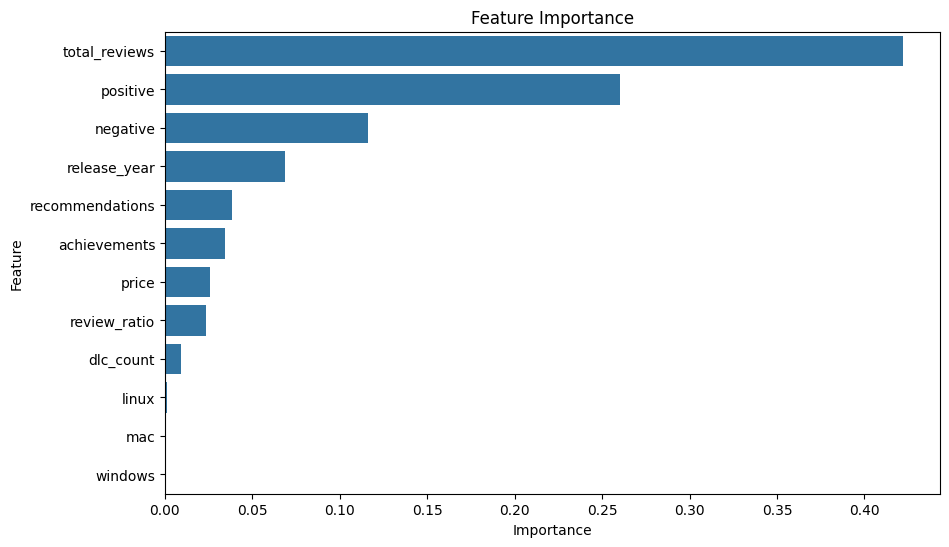

Top 5 most important features:
            Feature  Importance
11    total_reviews    0.422067
7          positive    0.260182
8          negative    0.116190
9      release_year    0.068616
6   recommendations    0.038145


In [ ]:
# Feature importance
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Insights from feature importance
print("Top 5 most important features:")
print(importance_df.head(5))